#1.Numpy의 polyfit으로 regression 분석하기(Clone-coding)

In [1]:
import warnings
warnings.filterwarnings("ignore") #경고창 무시 , 매우 자주 사용 
import pandas as pd 
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [7]:
hyeok_web = pd.read_csv('data/08. PinkWink Web Traffic.csv',
                       encoding="utf-8",thousands=",",  #천자리마다 콤마
                       names=['date','hit'],index_col=0)
hyeok_web = hyeok_web[hyeok_web['hit'].notnull()]
hyeok_web.tail()

,hit
date,
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0
17. 6. 30.,1193.0


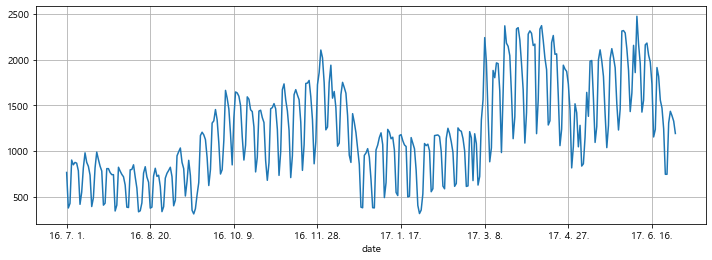

In [8]:
hyeok_web['hit'].plot(figsize=(12,4),grid=True);

In [14]:
time = np.arange(0,len(hyeok_web))
traffic = hyeok_web['hit'].values

fx = np.linspace(0,time[-1],1000) #알아서 구간 등분하는 것 .


In [15]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))  #표준편차를 error로 정의 

In [19]:
fp1=np.polyfit(time,traffic,1) # 주어진 데이터에 대해 최소제곱을 갖는 다항식 피팅을 반환. >> 함수의 기울기와 절편값을 array로 반환
f1 = np.poly1d(fp1)  #polyfit과 형태는 유사하지만 수학적인 다항식의 의미를 가지고 있고 실질적인 함수로 표현이 가능하다. 

fp2=np.polyfit(time,traffic,2)
f2=np.poly1d(fp2)

fp3=np.polyfit(time,traffic,3)
f3=np.poly1d(fp3)

fp15=np.polyfit(time,traffic,15)
f15=np.poly1d(fp15)

print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))


430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


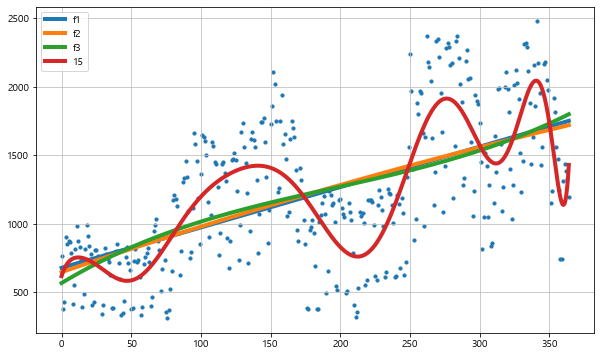

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(time,traffic,s=10) #산점도 (x,y) s는 size 

plt.plot(fx,f1(fx),lw=4,label="f1")
plt.plot(fx,f2(fx),lw=4,label="f2")
plt.plot(fx,f3(fx),lw=4,label="f3")
plt.plot(fx,f15(fx),lw=4,label="15") #과적합 문제 

plt.grid(True,linestyle="-",color='0.75')
plt.legend(loc='best') #범주(legend),loc(대략 위치설정)
plt.show()

#3차이하는 시간이 갈수록 단순 우상향 비례, 15차도 우상향 성질,but 등락반복

#2.Prophet 모듈을 이용한 forecast(Clone-coding)

In [26]:
df=pd.DataFrame({'ds':hyeok_web.index, 'y':hyeok_web['hit']})
df.reset_index(inplace=True)  
#기존 ds의 형태 17.6.26
df['ds'] = pd.to_datetime(df['ds'], format= "%y. %m. %d.")
#to_datetime 이용해 2017-06-26 날짜라고 선언 
del df['date']

m = Prophet(yearly_seasonality=True) #주기성이 연단위로 있다.
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=60)
future.head()

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05


In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,908.312485,684.886500,1116.548004
421,2017-08-26,493.269868,282.813476,705.865277
422,2017-08-27,625.855539,418.958353,825.712474
423,2017-08-28,1178.497203,985.065274,1384.626529
424,2017-08-29,1214.444999,1008.975797,1421.127157


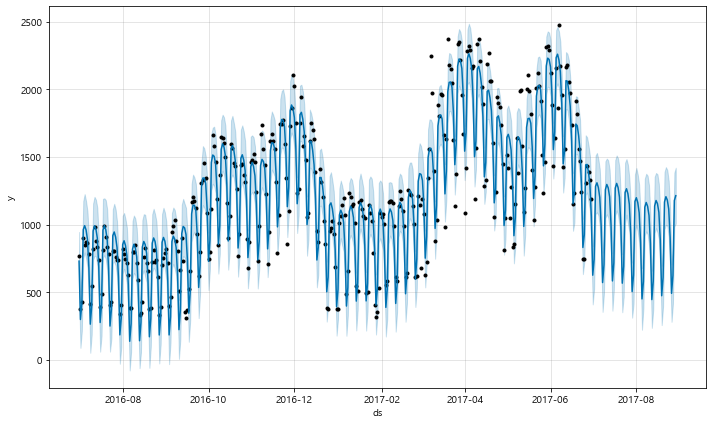

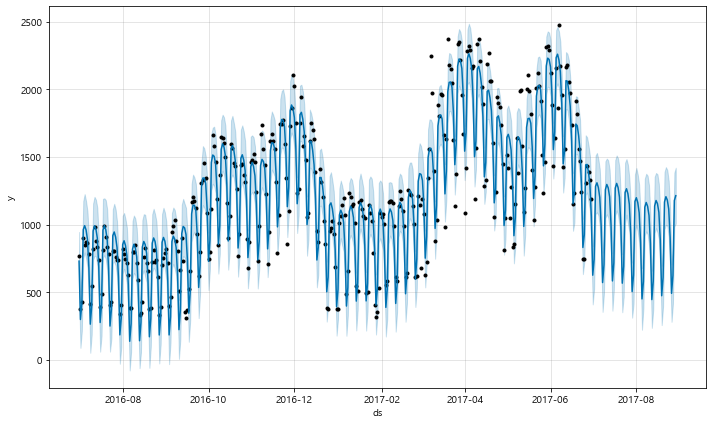

In [32]:
m.plot(forecast)

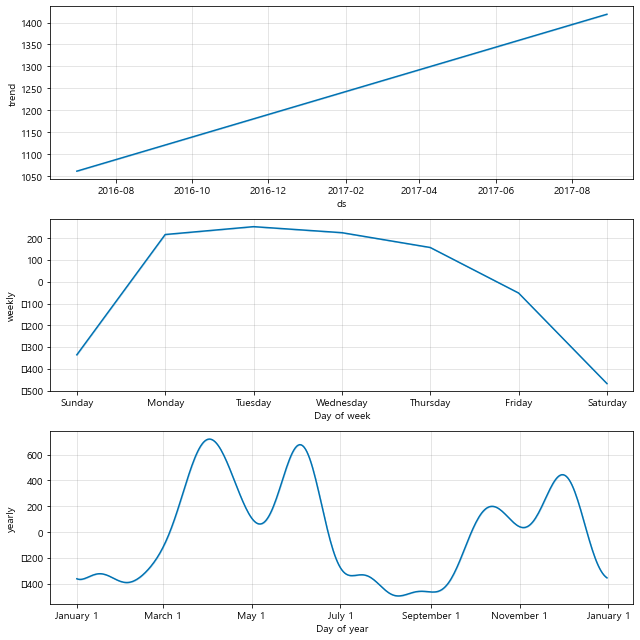

In [33]:
m.plot_components(forecast);

#1.전체적인 추세는 우상향 

#2.화요일 방문자 정점, 목요일 이후부터는 확연히 감소 

#3. 4,6월에 최고점 

#3. Seasonal 시계열 분석으로 주식 데이터 분석하기 (찐 시작)

In [53]:
start = datetime(2016,11,17)
end = datetime(2021,9,9)

Disney = web.DataReader('DIS','yahoo',start,end) #yahoo finance에서 가져옴
Disney.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-16,99.169998,98.099998,98.330002,99.120003,9702400.0,94.193405
2016-11-17,99.500000,98.269997,99.050003,99.370003,8662600.0,94.430969
2016-11-18,99.370003,98.139999,99.050003,98.239998,8586100.0,93.357132
2016-11-21,98.269997,97.000000,98.110001,97.629997,10771100.0,92.777458
2016-11-22,97.930000,97.269997,97.400002,97.709999,5323700.0,92.853477


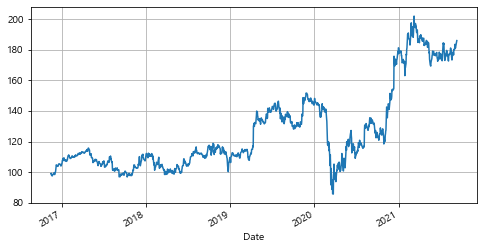

In [54]:
Disney['Close'].plot(figsize=(8,4),grid=True); #종가로 plot 그리기
# 어쩄든 우상향인듯 

In [56]:
Disney_trunc = Disney[:'2020-9-10'] #문자열 슬라이싱은 끝도 포함 ㅇㅇ 
Disney_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-16,99.169998,98.099998,98.330002,99.120003,9702400.0,94.193405
2016-11-17,99.500000,98.269997,99.050003,99.370003,8662600.0,94.430969
2016-11-18,99.370003,98.139999,99.050003,98.239998,8586100.0,93.357132
2016-11-21,98.269997,97.000000,98.110001,97.629997,10771100.0,92.777458
2016-11-22,97.930000,97.269997,97.400002,97.709999,5323700.0,92.853477
...,...,...,...,...,...,...
2020-09-03,137.240005,132.020004,135.240005,133.240005,12079200.0,133.240005
2020-09-04,134.880005,129.419998,133.750000,131.990005,11248300.0,131.990005
2020-09-08,137.139999,130.860001,131.990005,134.199997,17257300.0,134.199997


In [60]:
df = pd.DataFrame({'ds':Disney_trunc.index,'y':Disney_trunc['Close']})
df=df.reset_index(inplace=False) #default index사용하겠다. 
#inplace= True : 해당 데이터프레임 정렬된 결과로 바뀐다.
# sort와 같은 의미 (자기변화메소드)
#False는 정렬 x, 그 결과는 다시 객체에 반영해야됨(변수를 지정해야 한다)
#sorted와 같은 의미 
del df['Date']
df.head()

,ds,y
0,2016-11-16,99.120003
1,2016-11-17,99.370003
2,2016-11-18,98.239998
3,2016-11-21,97.629997
4,2016-11-22,97.709999


In [61]:
m=Prophet() #미래 예측 가능
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = m.make_future_dataframe(periods=365)  #1년예측시작!
future.tail()

,ds
1320,2021-09-06
1321,2021-09-07
1322,2021-09-08
1323,2021-09-09
1324,2021-09-10


In [63]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1320,2021-09-06,99.380308,59.367302,143.996582
1321,2021-09-07,99.279643,58.471555,144.689123
1322,2021-09-08,98.878239,58.652624,144.199295
1323,2021-09-09,98.521237,57.334718,144.471206
1324,2021-09-10,98.224415,55.360530,143.411168


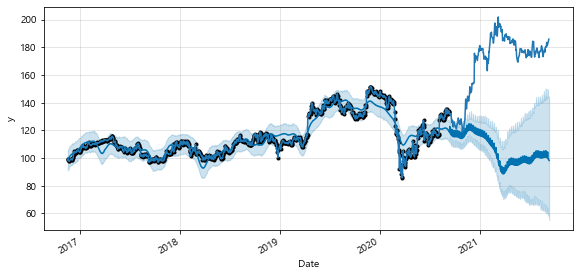

In [65]:
m.plot(forecast),Disney['Close'].plot(figsize=(8,4),grid=True); 

#예측이 완전히 실패하엿다..  그만큼 디즈니가 대단하다는 것을 알 수 있다.. 
#Upper line을 크게 상회한 모습 !! 
#주가는 역시 함부로 예측하기 어렵다.

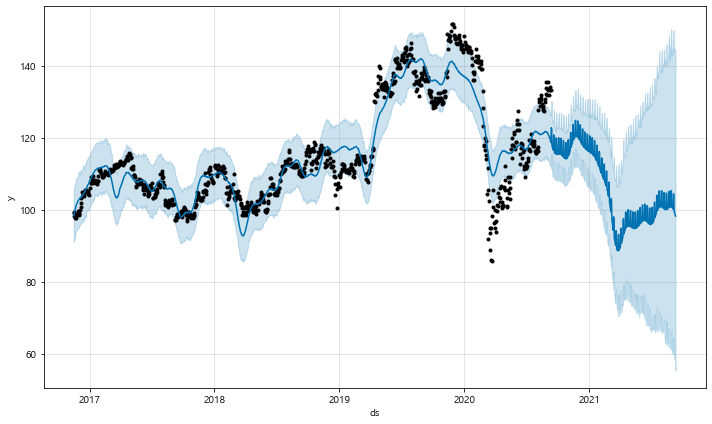

In [67]:
m.plot(forecast);

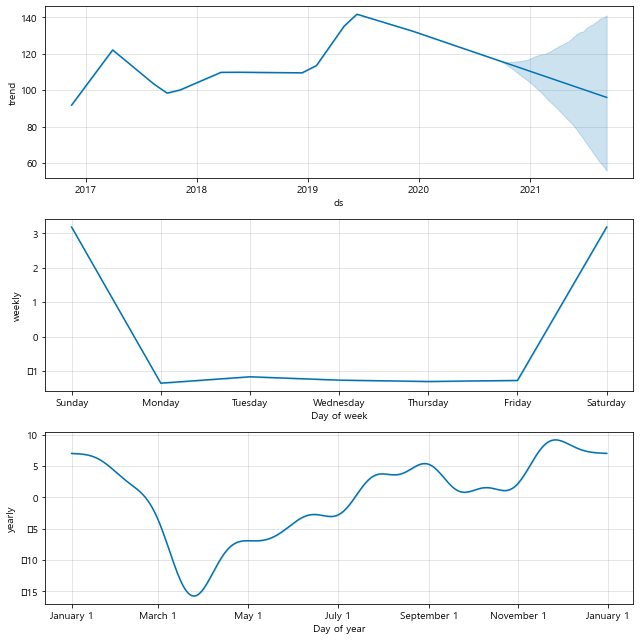

In [69]:
m.plot_components(forecast); #단순 선형회귀로는 우하향을 그릴 수 밖에 없는 상태 ㅇㅇ 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-16,99.169998,98.099998,98.330002,99.120003,9702400.0,94.193405
2016-11-17,99.500000,98.269997,99.050003,99.370003,8662600.0,94.430969
2016-11-18,99.370003,98.139999,99.050003,98.239998,8586100.0,93.357132
2016-11-21,98.269997,97.000000,98.110001,97.629997,10771100.0,92.777458
2016-11-22,97.930000,97.269997,97.400002,97.709999,5323700.0,92.853477
...,...,...,...,...,...,...
2020-12-24,174.580002,172.380005,173.990005,173.729996,2721000.0,173.729996
2020-12-28,179.919998,175.050003,175.750000,178.860001,13145400.0,178.860001
2020-12-29,180.199997,176.220001,180.009995,177.300003,6875400.0,177.300003


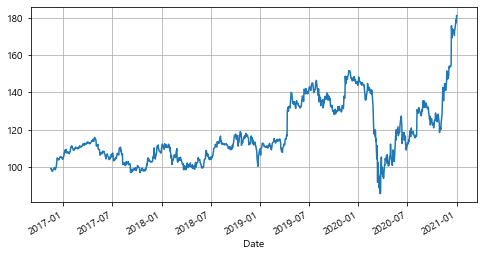

In [72]:
Disney_Trunc = Disney[:'2021-01-01']
Disney_Trunc['Close'].plot(figsize=(8,4),grid=True);
Disney_Trunc

In [75]:
df=pd.DataFrame({'ds':Disney_Trunc.index,'y':Disney_Trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df

,ds,y
0,2016-11-16,99.120003
1,2016-11-17,99.370003
2,2016-11-18,98.239998
3,2016-11-21,97.629997
4,2016-11-22,97.709999
...,...,...
1033,2020-12-24,173.729996
1034,2020-12-28,178.860001
1035,2020-12-29,177.300003
1036,2020-12-30,181.169998


In [76]:
m=Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
future=m.make_future_dataframe(periods=240)
future.tail()

,ds
1273,2021-08-24
1274,2021-08-25
1275,2021-08-26
1276,2021-08-27
1277,2021-08-28


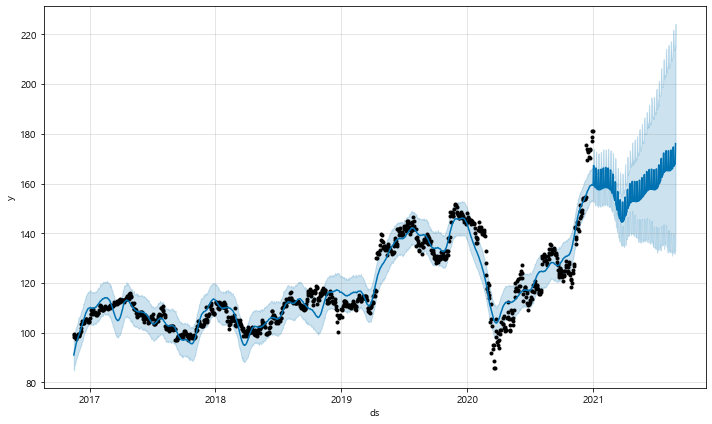

In [78]:
forecast = m.predict(future)
m.plot(forecast);

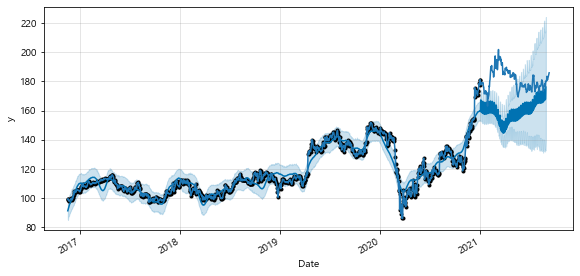

In [79]:
m.plot(forecast),Disney['Close'].plot(figsize=(8,4),grid=True); 

#periods 365보다 periods 240이 오차나 방향성은 훨 줄어들었지만 그래도 regression 영역은 벗어난 상태.


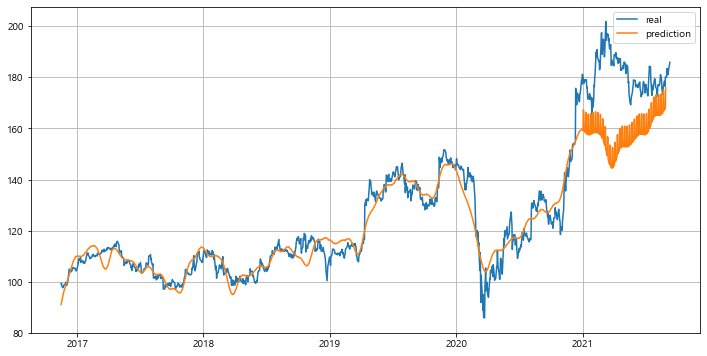

In [80]:
plt.figure(figsize=(12,6))
plt.plot(Disney.index,Disney['Close'],label="real")  #plot(x,y,label) ㅇㅇ 
plt.plot(forecast['ds'],forecast['yhat'],label="prediction")
plt.grid()
plt.legend(loc="best")
plt.show()

#4.Prophet 튜토리얼, Growth model

In [82]:
df=pd.read_csv('data/08. example_wp_R.csv')
df['y']=np.log(df['y']) #로그화 시킨다. 
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [83]:
df['cap']=8.5

In [84]:
m = Prophet(growth="logistic") #로지스틱
m.fit(df) # 먼저 Prophet에 df 적용시킨다.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


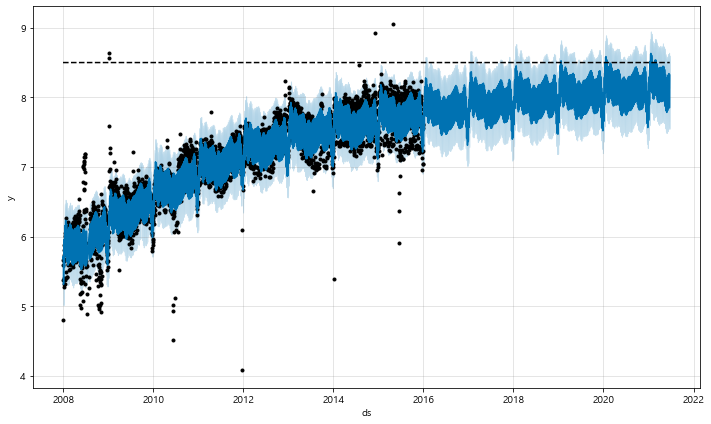

In [85]:
future=m.make_future_dataframe(periods=2000) #미래의 데이터프레임을 생성시켜놓고 
future['cap']=8.5
fcst=m.predict(future) #그 데이터 프레임의 데이터 예측 yhat 값 생성 
m.plot(fcst);

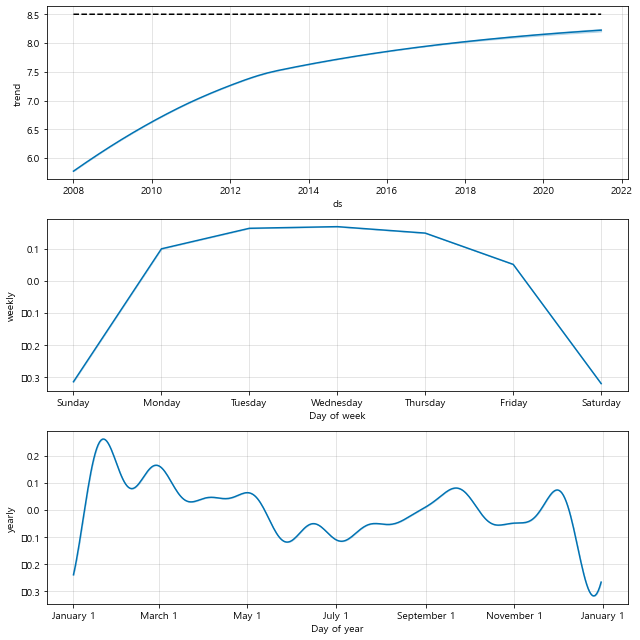

In [87]:
m.plot_components(fcst); #전형적인 로그함수의 모양이 나온다. 

#1.trend : 전체적 경향
#2.Weekly: 주간분석
#3.Monthly: 월간분석